<a href="https://colab.research.google.com/github/sophie55555/AIFFEL_quest_crAIFFEL_quest_cr/blob/main/20250324_cifar10(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.AveragePooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.AveragePooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# 모델 생성 및 요약 출력
temp_model = build_model()
temp_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

In [23]:
!pip install cleanlab


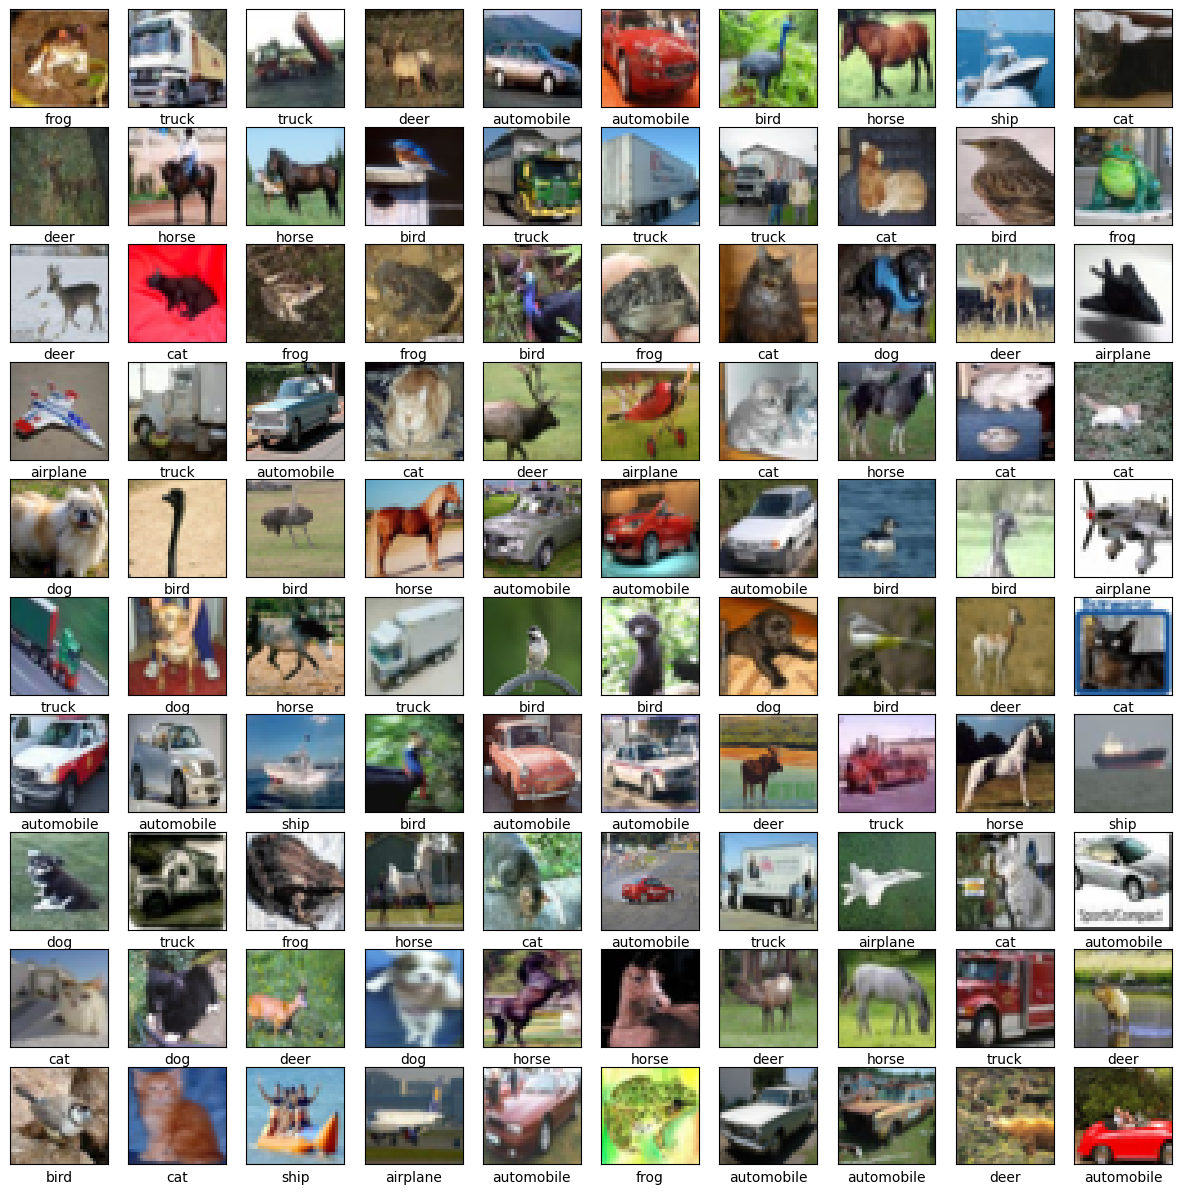

레이블링 정보:
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck

y_train shape: (50000, 1)

y_train[0:10]:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 클래스 이름 정의 (CIFAR-10은 10개의 클래스를 가짐)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 이미지 시각화 (처음 100장)
plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])  # 레이블 표시

plt.show()

# 레이블링 정보 확인
print("레이블링 정보:")
for i in range(10):
    print(f"{i}: {class_names[i]}")

# y_train의 형태 확인 및 예시 출력
print(f"\ny_train shape: {y_train.shape}")
print("\ny_train[0:10]:\n", y_train[0:10])

1.하이퍼파라미터 없는 버전

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 15, 15, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 15, 15, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 6, 6, 64)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 612,426 (2.34 MB)

 Trainable params: 612,234 (2.34 MB)

 Non-trainable params: 192 (768.00 B)

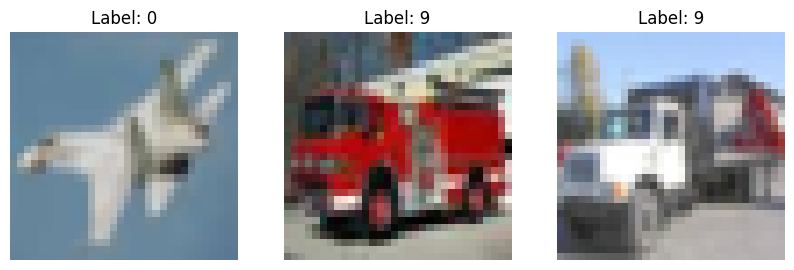

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import matplotlib.pyplot as plt
# import cleanlab

# # 모델 구성
# def build_model():
#     model = keras.Sequential([
#         layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
#         layers.AveragePooling2D((2, 2)),
#         layers.BatchNormalization(),

#         layers.Conv2D(64, (3, 3), activation='relu'),
#         layers.AveragePooling2D((2, 2)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256, activation='relu'),
#         layers.Dropout(0.5),
#         layers.Dense(10, activation='softmax')
#     ])

#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     return model

# # CIFAR-10 데이터 로드
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# # 데이터 정규화
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # 잘못된 라벨 확인 및 시각화
# def visualize_label_errors():
#     error_indices = [10, 23, 45]  # labelerrors.com에서 제공하는 잘못된 라벨 ID 예시

#     fig, axes = plt.subplots(1, len(error_indices), figsize=(10, 5))
#     for i, idx in enumerate(error_indices):
#         axes[i].imshow(x_test[idx])
#         axes[i].set_title(f"Label: {y_test[idx][0]}")
#         axes[i].axis('off')
#     plt.show()

# # 모델 생성 및 요약 출력
# temp_model = build_model()
# temp_model.summary()

# # 잘못된 라벨 시각화 실행
# visualize_label_errors()

In [4]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


2. 하이퍼파라미터 있는 버전

Trial 30 Complete [00h 01m 15s]
val_accuracy: 0.6736000180244446

Best val_accuracy So Far: 0.7317000031471252
Total elapsed time: 00h 18m 50s
Best hyperparameters: {'conv1_filters': 96, 'conv2_filters': 192, 'dense_units': 256, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0013'}


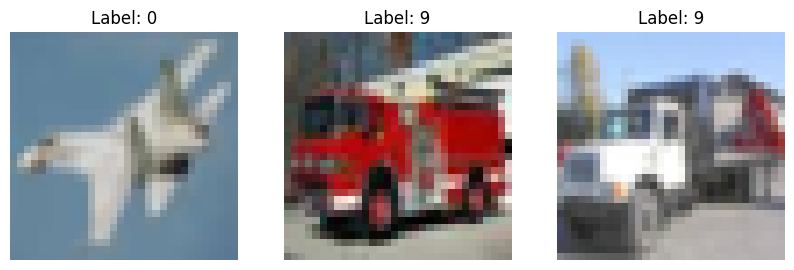

In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import matplotlib.pyplot as plt
# import cleanlab
# import keras_tuner as kt

# # 모델 구성
# def build_model(hp):
#     model = keras.Sequential()

#     # 첫 번째 Conv2D 레이어
#     model.add(layers.Conv2D(
#         filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
#         kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)
#     ))
#     model.add(layers.AveragePooling2D((2, 2)))
#     model.add(layers.BatchNormalization())

#     # 두 번째 Conv2D 레이어
#     model.add(layers.Conv2D(
#         filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
#         kernel_size=(3, 3), activation='relu'
#     ))
#     model.add(layers.AveragePooling2D((2, 2)))
#     model.add(layers.BatchNormalization())

#     model.add(layers.Flatten())

#     # Dense 레이어
#     model.add(layers.Dense(
#         units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
#         activation='relu'
#     ))
#     model.add(layers.Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.7])))
#     model.add(layers.Dense(10, activation='softmax'))

#     model.compile(
#         optimizer=keras.optimizers.Adam(
#             hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
#         ),
#         loss='sparse_categorical_crossentropy',
#         metrics=['accuracy']
#     )

#     return model

# # CIFAR-10 데이터 로드
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# # 데이터 정규화
# x_train, x_test = x_train / 255.0, x_test / 255.0

# # 잘못된 라벨 확인 및 시각화
# def visualize_label_errors():
#     error_indices = [10, 23, 45]  # labelerrors.com에서 제공하는 잘못된 라벨 ID 예시

#     fig, axes = plt.subplots(1, len(error_indices), figsize=(10, 5))
#     for i, idx in enumerate(error_indices):
#         axes[i].imshow(x_test[idx])
#         axes[i].set_title(f"Label: {y_test[idx][0]}")
#         axes[i].axis('off')
#     plt.show()

# # 하이퍼파라미터 튜닝 실행
# tuner = kt.Hyperband(
#     build_model,
#     objective='val_accuracy',
#     max_epochs=10,
#     factor=3,
#     directory='hyperband_tuning',
#     project_name='cifar10'
# )

# def tuner_callback():
#     stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#     tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])
#     best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
#     print(f"Best hyperparameters: {best_hps.values}")

# # 실행
# tuner_callback()

# # 잘못된 라벨 시각화 실행
# visualize_label_errors()


Data Centric AI 맛보기
Data Centric AI를 공부했으니 한번 맛은 봐야겠죠? Data Centric AI를 정석적으로 진행한다면 훈련 데이터셋과 테스트 데이터셋을 전부 열어서 확인해서 틀린 것이 없는지 검수해야 합니다.
하지만 우리에게는 일일이 해볼만한 시간은 존재하지 않으니 사람들이 미리 검수했던 내용들을 기반으로 프로젝트를 진행하겠습니다.

labelerrors.com
labelerrors.com은 Data Centric AI에서 가장 많이 활용하고 있는 파이썬 라이브러리인 cleanlab을 만든 개발자들이 공개한 사이트입니다.

labelerrors.com은 이름에서 알 수 있듯이 테스트 데이터와 label이 잘못 붙어 있는 사례를 모아 보여줍니다.
labelerrors.com에서 CIFAR10 테스트 데이터셋을 확인하고 아래 조그맣게 있는 ID를 기준으로 직접 데이터셋을 시각화하고 실제 label이 잘못 붙어있다면 label을 수정해주세요.

3.틀린 라벨 표시(어떻게 틀렸는지 추가) 버전

Reloading Tuner from hyperband_tuning/cifar10/tuner0.json
Best hyperparameters: {'conv1_filters': 96, 'conv2_filters': 192, 'dense_units': 512, 'dropout_rate': 0.7, 'learning_rate': 0.0001, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3102 - loss: 2.6626 - val_accuracy: 0.5247 - val_loss: 1.4050
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.4702 - loss: 1.6565 - val_accuracy: 0.5837 - val_loss: 1.2030
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5531 - loss: 1.3281 - val_accuracy: 0.6298 - val_loss: 1.0843
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6109 - loss: 1.1380 - val_accuracy: 0.6491 - val_loss: 1.0171
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6525 - loss: 1.0050 - val_accuracy: 0.6748 - val_loss: 0.9418
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6892

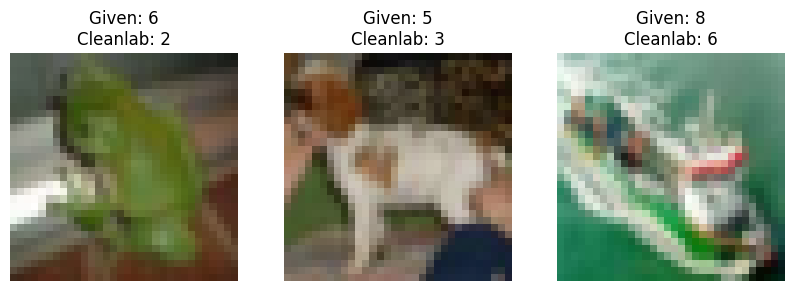

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cleanlab
import keras_tuner as kt
from cleanlab.filter import find_label_issues
import os

# 모델 구성
def build_model(hp):
    model = keras.Sequential()

    # 첫 번째 Conv2D 레이어
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)
    ))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # 두 번째 Conv2D 레이어
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=(3, 3), activation='relu'
    ))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())

    # Dense 레이어
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(layers.Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.7])))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# Cleanlab을 이용한 라벨 오류 탐지
def detect_label_errors():
    model_path = "saved_model/cifar10_model.keras"

    # 파일이 존재하는지 확인 후 로드
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found: {model_path}. 먼저 모델을 저장하세요!")

    model = keras.models.load_model(model_path)
    pred_probs = model.predict(x_test)
    label_issues = find_label_issues(y_test.flatten(), pred_probs)
    return np.where(label_issues)[0]


# 잘못된 라벨 시각화 및 정정
def visualize_and_correct_label_errors():
    model_path = "saved_model/cifar10_model.keras"
    model = keras.models.load_model(model_path)  # .keras 형식 사용
    pred_probs = model.predict(x_test)  # 확률 예측값 계산
    error_indices = detect_label_errors()

    fig, axes = plt.subplots(1, len(error_indices[:3]), figsize=(10, 5))
    for i, idx in enumerate(error_indices[:3]):
        axes[i].imshow(x_test[idx])
        axes[i].set_title(f"Given: {y_test[idx][0]}\nCleanlab: {np.argmax(pred_probs[idx])}")  # 수정 완료
        axes[i].axis('off')
    plt.show()


# 하이퍼파라미터 튜닝 실행
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband_tuning',
    project_name='cifar10'
)

def tuner_callback():
    stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    tuner.search(x_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    print(f"Best hyperparameters: {best_hps.values}")

    # **모델 저장 코드 추가**
    # best_model = tuner.get_best_model()  # AttributeError: 'Hyperband' object has no attribute 'get_best_model'
    best_model = tuner.hypermodel.build(best_hps) # 가장 좋은 모델을 hyperparameter를 이용해서 build
    best_model.fit(x_train, y_train, epochs=10, validation_split=0.2)  # 훈련 데이터로 다시 학습

    os.makedirs("saved_model", exist_ok=True) # 디렉토리 생성 (이미 존재하면 pass)
    best_model.save("saved_model/cifar10_model.keras") # 모델 저장


# 실행
tuner_callback()

# 잘못된 라벨 시각화 실행
visualize_and_correct_label_errors()

In [38]:
# CIFAR-10 데이터 로드 (이전 코드와 동일하게 로드)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 저장된 모델 로드
model_path = "saved_model/cifar10_model.keras"
model = keras.models.load_model(model_path)

# 모델 평가
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)  # verbose=0: 평가 과정 출력 X
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 528.7448120117188
Test Accuracy: 0.36899998784065247


In [16]:
# 데이터 크기 확인
num_train_samples = x_train.shape[0]
num_test_samples = x_test.shape[0]
total_samples = num_train_samples + num_test_samples

print(f"훈련 데이터 개수: {num_train_samples}")
print(f"테스트 데이터 개수: {num_test_samples}")
print(f"전체 데이터 개수: {total_samples}")

훈련 데이터 개수: 50000
테스트 데이터 개수: 10000
전체 데이터 개수: 60000


In [18]:
error_indices = detect_label_errors() # 라벨 오류가 있는 index 저장
print(f"Number of label errors detected: {len(error_indices)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Number of label errors detected: 6305


In [10]:
# 모델 저장 (TensorFlow Serving 용)
def save_model_for_serving(model, path="saved_model/cifar10_model.keras"):
    model.save(path, save_format="keras")  # .keras 형식으로 저장
    print(f"Model saved for TF Serving at {path}")

In [11]:
# Docker 또는 WSL2 환경에서 TensorFlow Serving 실행 명령어 출력
def print_tf_serving_commands():
    print("# Docker에서 TensorFlow Serving 실행")
    print("docker run -p 8501:8501 --name=tf_serving \\")
    print("-v $(pwd)/saved_model/cifar10_model:/models/cifar10_model \\")
    print("-e MODEL_NAME=cifar10_model -t tensorflow/serving")


In [12]:
# 모델을 TFLite로 변환
def convert_to_tflite(model, tflite_path="cifar10_model.tflite"):
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()
    with open(tflite_path, "wb") as f:
        f.write(tflite_model)
    print(f"TFLite model saved at {tflite_path}")

In [13]:
# TFLite 서명 확인
def check_tflite_signatures(tflite_path="cifar10_model.tflite"):
    interpreter = tf.lite.Interpreter(model_path=tflite_path)
    print("TFLite model signatures:")
    print(interpreter.get_signature_list())

In [28]:
import cleanlab
print(cleanlab.__version__)  # 현재 cleanlab 버전 확인

!pip install -U cleanlab  # 최신 버전으로 업데이트

2.7.1


자동 라벨 수정 (선택 사항)   
Cleanlab의 clean_labels 함수를 사용하여 자동으로 라벨을 수정할 수 있습니다.

In [31]:
# 자동 라벨 수정 (Cleanlab 사용)
from cleanlab.filter import find_label_issues  # 모듈 위치 변경
import numpy as np
import tensorflow as tf
from tensorflow import keras

# CIFAR-10 데이터 로드 (테스트 데이터셋만 사용)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 저장된 모델 로드 (모델 로드 코드가 빠져있다면 추가)
model_path = "saved_model/cifar10_model.keras"
model = keras.models.load_model(model_path)

# 모델 예측 확률 계산
pred_probs = model.predict(x_test)

# Cleanlab에 필요한 형식으로 변환
labels = np.array(y_test).flatten()  # NumPy 배열로 변환 및 1차원 배열로 변환
pred_probs = np.array(pred_probs)  # NumPy 배열로 변환

# find_label_issues 함수 적용
label_issues_idx = find_label_issues(
    labels=labels,
    pred_probs=pred_probs
)

# cleaned_labels 결과를 y_test에 반영 (신중하게!)
# 이 레이블을 y_test에 덮어씌우기 전에, 그 내용과 기존 레이블과의 차이를 신중하게 검토해야 합니다.
# label_issues_idx를 기반으로 라벨을 수정하는 코드를 작성해야 합니다.

#cleaned_labels 결과를 y_test에 반영 (신중하게!)
#이 레이블을 y_test에 덮어씌우기 전에, 그 내용과 기존 레이블과의 차이를 신중하게 검토해야 합니다.
#label_issues_idx를 기반으로 라벨을 수정하는 코드를 작성해야 합니다.

num_changes = len(label_issues_idx) #수정할 라벨의 개수
print(f"Number of labels to be changed: {num_changes}")

if input("Apply automatic label corrections? (y/n): ").lower() == 'y':
    # for loop를 사용하여 y_test의 label을 순차적으로 변경
    for idx in label_issues_idx:
        # pred_probs[idx]가 비어있는지 확인
        if pred_probs[idx].size > 0:
            # Cleanlab이 판단하기에 가장 적합한 label로 변경
            y_test[idx] = np.argmax(pred_probs[idx])  # y_test 업데이트
            print(f"Label corrected to {np.argmax(pred_probs[idx])}")
        else:
            print(f"Skipping index {idx} due to empty prediction probabilities.")
    print("Automatic label correction applied.")
else:
    print("Automatic label correction skipped.")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Label corrected to 3
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Skipping index False due to empty prediction probabilities.
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Skipping index False due to empty prediction probabilities.
Label corrected to 3
Label corrected to 3
Label corrected to 3
Label corrected to 3
Label corr

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cleanlab
import keras_tuner as kt
from cleanlab.filter import find_label_issues
import os

# 모델 구성 (하이퍼파라미터 튜닝 결과 사용)
def build_model(hp):
    model = keras.Sequential()

    # 첫 번째 Conv2D 레이어
    model.add(layers.Conv2D(
        filters=hp.Int('conv1_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)
    ))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    # 두 번째 Conv2D 레이어
    model.add(layers.Conv2D(
        filters=hp.Int('conv2_filters', min_value=64, max_value=256, step=64),
        kernel_size=(3, 3), activation='relu'
    ))
    model.add(layers.AveragePooling2D((2, 2)))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())

    # Dense 레이어
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(layers.Dropout(rate=hp.Choice('dropout_rate', values=[0.3, 0.5, 0.7])))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 하이퍼파라미터 튜닝 실행 (이전 코드에서 튜닝된 하이퍼파라미터 재사용)
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hyperband_tuning',
    project_name='cifar10',
    overwrite=False  # 기존 튜닝 결과 재사용
)

# 저장된 모델 로드 (이전 코드에서 학습된 모델)
model_path = "saved_model/cifar10_model.keras"
model = keras.models.load_model(model_path)

# 모델 재정의 (동일한 아키텍처 및 하이퍼파라미터로)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]  # 튜닝된 하이퍼파라미터 가져오기
retrained_model = tuner.hypermodel.build(best_hps)  # 모델 재정의

# 컴파일 (기존 모델과 동일한 설정)
retrained_model.compile(optimizer=model.optimizer.name,  # optimizer 재사용
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# 모델 훈련 (수정되지 않은 데이터셋 사용)
retrained_model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# 모델 평가 (테스트 데이터셋 사용)
loss, accuracy = retrained_model.evaluate(x_test, y_test, verbose=0)
print(f"Retrained Model Test Loss: {loss}")
print(f"Retrained Model Test Accuracy: {accuracy}")

# (선택 사항) 새로운 모델 저장
retrained_model.save("saved_model/cifar10_model_retrained.keras")

Reloading Tuner from hyperband_tuning/cifar10/tuner0.json
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.3182 - loss: 3.9016 - val_accuracy: 0.5008 - val_loss: 1.4350
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5152 - loss: 1.3745 - val_accuracy: 0.5085 - val_loss: 1.5080
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5898 - loss: 1.1726 - val_accuracy: 0.5806 - val_loss: 1.3402
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6349 - loss: 1.0483 - val_accuracy: 0.3556 - val_loss: 21.2523
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6687 - loss: 0.9521 - val_accuracy: 0.5469 - val_loss: 1.3695
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6933 - loss: 0.8729 - val_accuracy: 0.6817 - val_loss: 0.9690
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7278 - loss: 0.7859 - val_accuracy: 0.6958 - val_loss: 0.9273
Epoch 8/10
1250/1250 ━━━━━━━━